<a href="https://colab.research.google.com/github/Niharika2475/AIML-2025_B15/blob/main/2303a51955_Q10_B15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [2]:
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
car_data = pd.read_csv('car.data', header=None, names=columns)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in car_data.columns:
    car_data[col] = le.fit_transform(car_data[col])

In [4]:
X = car_data.iloc[:, :-1]  # Features: all columns except 'class'
y = car_data['class']      # Target: 'class'

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
buying_counts = car_data['buying'].value_counts()
maint_counts = car_data['maint'].value_counts()
doors_counts = car_data['doors'].value_counts()
persons_counts = car_data['persons'].value_counts()
lug_boot_counts = car_data['lug_boot'].value_counts()

print("Top Reasons for Buying a Car:")
print("Buying Price Distribution:\n", buying_counts)
print("Maintenance Cost Distribution:\n", maint_counts)
print("Doors Distribution:\n", doors_counts)
print("Persons Capacity Distribution:\n", persons_counts)
print("Luggage Boot Size Distribution:\n", lug_boot_counts)

Top Reasons for Buying a Car:
Buying Price Distribution:
 buying
3    432
0    432
2    432
1    432
Name: count, dtype: int64
Maintenance Cost Distribution:
 maint
3    432
0    432
2    432
1    432
Name: count, dtype: int64
Doors Distribution:
 doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64
Persons Capacity Distribution:
 persons
0    576
1    576
2    576
Name: count, dtype: int64
Luggage Boot Size Distribution:
 lug_boot
2    576
1    576
0    576
Name: count, dtype: int64


In [7]:
# Predictions
y_pred = clf.predict(X_test)

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519

Accuracy: 0.9710982658959537


In [9]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)



Decision Tree Rules:
 |--- persons <= 0.50
|   |--- class: 2
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- maint <= 2.50
|   |   |   |--- buying <= 0.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- buying >  0.50
|   |   |   |   |--- buying <= 2.50
|   |   |   |   |   |--- maint <= 0.50
|   |   |   |   |   |   |--- buying <= 1.50
|   |   |   |   |   |   |   |--- lug_boot <= 0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- lug_boot >  0.50
|   |   |   |   |   |   |   |   |--- doors <= 2.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |---

In [12]:
class_counts = car_data['class'].value_counts()
print("\nClass Distribution (Cars Sold):")
print(class_counts)


Class Distribution (Cars Sold):
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [13]:
safety_counts = car_data['safety'].value_counts()
max_safety = safety_counts.idxmax()
min_safety = safety_counts.idxmin()
print("\nMax Safety Choice:", max_safety)
print("Min Safety Choice:", min_safety)


Max Safety Choice: 1
Min Safety Choice: 1


In [14]:
print("\nRole of Features in Decision Making:")
print("Buying vs Class:\n", car_data.groupby('class')['buying'].value_counts(normalize=True))
print("Doors vs Class:\n", car_data.groupby('class')['doors'].value_counts(normalize=True))
print("Luggage Boot vs Class:\n", car_data.groupby('class')['lug_boot'].value_counts(normalize=True))



Role of Features in Decision Making:
Buying vs Class:
 class  buying
0      2         0.299479
       0         0.281250
       1         0.231771
       3         0.187500
1      1         0.666667
       2         0.333333
2      3         0.297521
       0         0.267769
       2         0.221488
       1         0.213223
3      1         0.600000
       2         0.400000
Name: proportion, dtype: float64
Doors vs Class:
 class  doors
0      2        0.265625
       3        0.265625
       1        0.257812
       0        0.210938
1      1        0.260870
       2        0.260870
       3        0.260870
       0        0.217391
2      0        0.269421
       1        0.247934
       2        0.241322
       3        0.241322
3      2        0.307692
       3        0.307692
       1        0.230769
       0        0.153846
Name: proportion, dtype: float64
Luggage Boot vs Class:
 class  lug_boot
0      0           0.375000
       1           0.351562
       2           0.27343

In [15]:
high_maintenance_cars = car_data[car_data['maint'] == 'vhigh']
print("\nCars with the Most Maintenance (vhigh):")
print(high_maintenance_cars)



Cars with the Most Maintenance (vhigh):
Empty DataFrame
Columns: [buying, maint, doors, persons, lug_boot, safety, class]
Index: []


In [16]:
le = LabelEncoder()
for col in car_data.columns:
    car_data[col] = le.fit_transform(car_data[col])


In [17]:
X = car_data.iloc[:, :-1]  # Features: all columns except 'class'
y = car_data['class']      # Target: 'class'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
y_pred = clf.predict(X_test)

In [20]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519

Accuracy Score: 0.9710982658959537


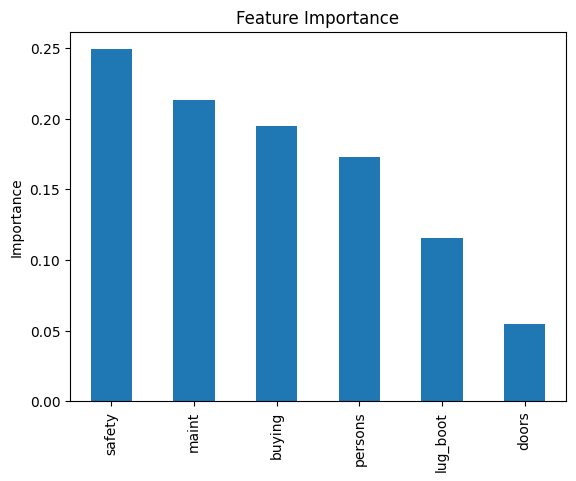

In [22]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance')
plt.show()